# ¿Como realizar las asignaciones para cada zona?

Para realizar las asignaciones por cada zona, uno de los metodos es separar las zonas por csv; es decir, que cada csv contenga toda la información necesaria de una zona especifica, asi al hacer la asignaciones tendremos el control de usuario y el control de zona más al detalle.

Quizas sea un método arcaico, pero es efectivo


Contacto: jcordovafredes@outlook.com

In [1]:
import datetime
import json
import arcgis
from arcgis.gis import GIS
from arcgis.geometry import Geometry
from arcgis.apps import workforce

In [2]:
gis = GIS("https://fau-uchile.maps.arcgis.com/", "jicoardova_fau")

Enter password: ········


In [3]:
item = gis.content.get("05d150615afb4351bcaa129e43502579")
project = workforce.Project(item)
project

<Project Asignaciones por zona>

In [4]:
trabajadores = gis.groups.get("5573ec020617466288bd149990d1ace0")
trabajadores

<Group title:"Trabajadores" owner:jicoardova_fau>

In [5]:
for username in trabajadores.get_members()["users"]:
    user = gis.users.get(username)
    project.workers.add(
        user_id=username,
        name=user.fullName,
        status="not_working",
        title="Trabajador de campo"
    )

<Group title:"Supervisores" owner:jicoardova_fau>
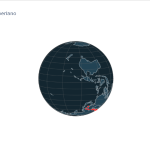

In [6]:
supervisores_grifos = gis.groups.get("be5f84c01c2d404ca78ec97ad5c17ee0")
supervisores_grifos

In [7]:
for username in supervisores_grifos.get_members()["users"]:
    if username != "jicoardova_fau":
        user = gis.users.get(username)
        project.dispatchers.add(
            user_id=username,
            name=user.fullName
        )

In [8]:
from arcgis.apps import build_explorer_url
from arcgis.mapping import WebMap

webmap = WebMap(gis.content.get("cbcbc17fdbff4e3697300d585366b817"))
webmap.item.share(groups=[project.group])
webmap

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [9]:
url = build_explorer_url(
    webmap=webmap,
    center="${assignment.latitude},${assignment.longitude}",
    url_type="App",
    scale=9000
)

In [10]:
project.integrations.add("default-explorer", "Explorer At Assignment", url)

<Integration default-explorer>

In [22]:
Daniela = project.workers.get(user_id="INTERGEO_04")
Felipe = project.workers.get(user_id="INTERGEO_06")
Andres = project.workers.get(user_id="andraes.smgo_fau")

In [17]:
assignment_types = project.assignment_types.add(name="Inspección de Grifo")

In [11]:
import pandas as pd

# Zona 1

es importante cambiar:
1.El nombre de csv para cada zona
2.Tanto el assignments como el df
3.El nombre del trabajador ("worker") para cada zona

In [38]:
assignments = f'C:/Users/jcord/OneDrive/Escritorio/XYGO/Scripts/asignaciones_zona_1.csv'
df = pd.read_csv(assignments, sep=";")
df

,1,Location,Description,Assigned,Priority,Work Order Id,Due Date
0,3,"Avenida Holanda 34, La Ligua",Zona 1: Colo Colo,INTERGEO_04,medium,2,31/8/2021 21:43
1,4,"Laulie 098, La Ligua",Zona 1: Colo Colo,INTERGEO_04,low,3,1/9/2021 19:43


In [18]:
from arcgis.geocoding import geocode
from datetime import datetime

In [39]:
assignments = []
for index, row in df.iterrows():
    geometry = geocode(f"{row['Location']}", out_sr=3857)[0]["location"]
    assignments.append(
        workforce.Assignment(
            project,
            geometry=geometry,
            location=row["Location"],
            description=row["Description"],
            priority=row["Priority"],
            work_order_id=row["Work Order Id"],
            assignment_type="Inspección de Grifo",
            status="assigned",
            worker= Daniela,
            due_date=pd.to_datetime(row["Due Date"])
        )
    )

In [40]:
#Agregar asignaciones con el metodo batch_add
project.assignments.batch_add(assignments)

[<Assignment 11>, <Assignment 12>]

# Zona 2

In [41]:
assignments_1 = f'C:/Users/jcord/OneDrive/Escritorio/XYGO/Scripts/asignaciones_zona_2.csv'
df_1 = pd.read_csv(assignments_1, sep=";")
df_1

,1,Location,Description,Assigned,Priority,Work Order Id,Due Date
0,5,"Diego Portales 699, La Ligua",Zona 2: Naval,INTERGEO_06,critical,4,2/9/2021 10:43
1,6,"Luis Cruz Martinez 690, La Ligua",Zona 2: Naval,INTERGEO_06,high,5,3/9/2021 18:43


In [42]:
assignments = []
for index, row in df_1.iterrows():
    geometry = geocode(f"{row['Location']}", out_sr=3857)[0]["location"]
    assignments.append(
        workforce.Assignment(
            project,
            geometry=geometry,
            location=row["Location"],
            description=row["Description"],
            priority=row["Priority"],
            work_order_id=row["Work Order Id"],
            assignment_type="Inspección de Grifo",
            status="assigned",
            worker= Felipe,
            due_date=pd.to_datetime(row["Due Date"])
        )
    )

In [43]:
#Agregar asignaciones con el metodo batch_add
project.assignments.batch_add(assignments)

[<Assignment 13>, <Assignment 14>]

# Zona 3

In [44]:
assignments_2 = f'C:/Users/jcord/OneDrive/Escritorio/XYGO/Scripts/asignaciones_zona_3.csv'
df_2 = pd.read_csv(assignments_2, sep=";")
df_2

,1,Location,Description,Assigned,Priority,Work Order Id,Due Date
0,2,"Papudo 815, La Ligua",Zona 3: Lozapenco FC,andraes.smgo_fau,high,1,30/8/2021 22:43
1,7,"Ignacio Carrera Pinto 830, La Ligua",Zona 3: Lozapenco FC,andraes.smgo_fau,low,6,4/9/2021 14:00


In [45]:
assignments = []
for index, row in df_2.iterrows():
    geometry = geocode(f"{row['Location']}", out_sr=3857)[0]["location"]
    assignments.append(
        workforce.Assignment(
            project,
            geometry=geometry,
            location=row["Location"],
            description=row["Description"],
            priority=row["Priority"],
            work_order_id=row["Work Order Id"],
            assignment_type="Inspección de Grifo",
            status="assigned",
            worker= Andres,
            due_date=pd.to_datetime(row["Due Date"])
        )
    )

In [46]:
#Agregar asignaciones con el metodo batch_add
project.assignments.batch_add(assignments)

[<Assignment 15>, <Assignment 16>]

In [31]:
webmap = gis.map("La Ligua", zoomlevel=12)
webmap.add_layer(project.assignments_layer)
webmap

MapView(layout=Layout(height='400px', width='100%'))